In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.patheffects as pe
import json
import math
import numpy as np
import os
import pandas as pd
import statistics
from scipy.stats import shapiro, levene, mannwhitneyu
import sys
import re

sys.path.append(os.path.expanduser("~/GitHub/EvenTDT"))
sys.path.append(os.path.expanduser("~/GitHub/multiplex-plot"))
sys.path = list(set(sys.path))

from eventdt.logger import logger
from eventdt.objects.exportable import Exportable

from multiplex import drawable

timeline_dir = os.path.expanduser('~/DATA/c7-emm/analyses/timelines/')

In [2]:
df = pd.DataFrame(columns=[ 'stream', 'date', 'consumed', 'filtered', 'discarded' ])
for file in os.listdir(timeline_dir):
    name = re.search('^[0-9]{8}', file)[0]
    date = datetime.strptime(name, '%Y%m%d')
    with open(os.path.join(timeline_dir, file)) as timeline:
        timeline = json.loads(''.join(timeline.readlines()))
        for stream, consumed, filtered in zip(timeline['pcmd']['splits'], timeline['consumed'], timeline['filtered']):
            df.loc[len(df)] = { 'stream': json.dumps(stream), 'date': date, 'consumed': consumed, 'filtered': filtered, 'discarded': consumed - filtered }

df['filtered%'] = df.filtered / df.consumed
df['discarded%'] = df.discarded / df.consumed
df = df.sort_values(by='date')
df

,stream,date,consumed,filtered,discarded,filtered%,discarded%
152,"[""*""]",2022-09-05,155099,68157,86942,0.439442,0.560558
130,"[""russian"", ""media"", ""disinform"", ""lie""]",2022-09-05,12941,7345,5596,0.567576,0.432424
131,"[""death"", ""viru"", ""travel"", ""vaccin""]",2022-09-05,3119,1821,1298,0.583841,0.416159
132,"[""term"", ""next"", ""presid"", ""end""]",2022-09-05,67959,52953,15006,0.77919,0.22081
133,"[""rig"", ""fraud"", ""say"", ""believ""]",2022-09-05,50668,38070,12598,0.751362,0.248638
...,...,...,...,...,...,...,...
275,"[""health"", ""team"", ""educ"", ""pick"", ""president-...",2022-09-10,1553,1057,496,0.680618,0.319382
276,"[""transit"", ""lose"", ""lost"", ""conced"", ""acknowl...",2022-09-10,2558,824,1734,0.322127,0.677873
277,"[""troop"", ""pay"", ""cut"", ""servic"", ""order""]",2022-09-10,5925,4681,1244,0.790042,0.209958
267,"[""senior"", ""agenc"", ""director"", ""commun"", ""int...",2022-09-10,2531,1949,582,0.770051,0.229949


In [3]:
df.groupby([ 'stream' ]).agg({ 'consumed': [ 'sum' ], 'filtered': [ 'sum' ], 'discarded': [ 'sum' ] }).sort_values(by=('consumed', 'sum'))

,consumed,filtered,discarded
,sum,sum,sum
stream,,,
"[""runoff"", ""senat""]",383,89,294
"[""violenc""]",775,428,347
"[""inaugur"", ""oath""]",2004,1548,456
"[""cast""]",2991,877,2114
"[""wear"", ""ralli"", ""mask""]",6551,3819,2732
"[""bid"", ""block"", ""certif""]",13246,8772,4474
"[""terrorist"", ""group""]",17176,10989,6187
"[""woman"", ""vice""]",19583,10383,9200


In [4]:
df[(df.stream == '["*"]')]['discarded%'].mean(), df[(df.stream == '["*"]')]['discarded%'].std()

(0.5752951967050145, 0.028913940243250596)

In [5]:
df[(df.stream != '["*"]')]['discarded%'].mean(), df[(df.stream != '["*"]')]['discarded%'].std()

(0.31704973778038686, 0.13914897059788606)

In [6]:
stat, p = shapiro(df[(df.stream == '["*"]')]['discarded%'])
if p > 0.05:
    print(f"Assuming that the default stream's filtering is normally-distributed (failed to reject H0) ({ round(p, 4) })")
else:
    print(f"The default stream's filtering are not normally-distributed (reject H0) ({ round(p, 4) })")
    
stat, p = shapiro(df[(df.stream != '["*"]')]['discarded%'])
if p > 0.05:
    print(f"Assuming that the streams' filtering is normally-distributed (failed to reject H0) ({ round(p, 4) })")
else:
    print(f"The streams' filtering are not normally-distributed (reject H0) ({ round(p, 4) })")

Assuming that the default stream's filtering is normally-distributed (failed to reject H0) (0.2611)
The streams' filtering are not normally-distributed (reject H0) (0.0)


In [7]:
stat, p = levene(df[(df.stream == '["*"]')]['discarded%'], df[(df.stream != '["*"]')]['discarded%'])
if p > 0.05:
    print(f"Assuming that the default stream and the other streams have equal variances (failed to reject H0) ({ round(p, 4) })")
else:
    print(f"The default stream and the other streams do not have equal variances (reject H0) ({ round(p, 4) })")

Assuming that the default stream and the other streams have equal variances (failed to reject H0) (0.0526)


Mann-Whitney U Test chosen because:

- The streams' filtering are not normally-distributed (so the Two-Samples T-Test does not apply)
- We have different sample sizes (so the Wilcoxon Signed Rank Test does not apply)

$$H0: \mu_{default} = \mu_{others}$$

$$H1: \mu_{default} < \mu_{others}$$

_[More on non-parametric two-samples tests](https://pages.stat.wisc.edu/~st571-1/Fall2005/lec18-21.1.pdf)_

In [8]:
stat, p = mannwhitneyu(df[(df.stream == '["*"]')]['discarded%'], df[(df.stream != '["*"]')]['discarded%'], alternative='greater')
if p > 0.05:
    print(f"Assuming that the default stream does not have a lower mean than the other streams (failed to reject H0) ({ round(p, 4) })")
else:
    print(f"The default stream has a lower mean than the other streams (reject H0) ({ round(p, 4) })")

The default stream has a lower mean than the other streams (reject H0) (0.0001)


In [9]:
# create a style for the precision
plt.style.use(os.path.join(os.getcwd(), '../modern-custom.style'))
style = { 'linewidth': 4, 'with_legend': True,
          'path_effects': [ pe.Stroke(linewidth=6, foreground='C4'), pe.Normal() ] }
marker_style = { 'marker': 'o', 'markersize': 12 }
scatter_style = dict(marker_style)
scatter_style.update({ 's': scatter_style['markersize'] ** 2, 'zorder': 100 })
del scatter_style['markersize']
annotation_marker_style = dict(marker_style)
annotation_marker_style.update({ 'markersize': 16, 'markeredgewidth': 3, 'markeredgecolor': 'C4' })
line_style = { 'alpha': 0.3, 'linestyle': '--', 'linewidth': 1 }
annotation_style = { 'fontsize': 'smaller', 'va': 'bottom', 'alpha': 0.8, 'pad': 0, 'facecolor': '#ffffff99' }

In [10]:
df[(df.stream == '["*"]')].groupby([ 'date' ]).agg({ 'consumed': [ 'sum' ], 'filtered': [ 'sum' ], 'discarded': [ 'sum' ] })

,consumed,filtered,discarded
,sum,sum,sum
date,,,
2022-09-05,155099,68157,86942
2022-09-06,152786,62409,90377
2022-09-07,95828,35909,59919
2022-09-08,99777,44886,54891
2022-09-09,45950,20604,25346
2022-09-10,33623,14368,19255


In [11]:
df[(df.stream != '["*"]')].groupby([ 'date' ]).agg({ 'consumed': [ 'sum' ], 'filtered': [ 'sum' ], 'discarded': [ 'sum' ] })

,consumed,filtered,discarded
,sum,sum,sum
date,,,
2022-09-05,1508070,1131271,376799
2022-09-06,1427957,1062056,365901
2022-09-07,1274028,953371,320657
2022-09-08,1199005,907954,291051
2022-09-09,460866,343559,117307
2022-09-10,243814,170336,73478


In [12]:
stream_filtering = df[(df.stream != '["*"]')]['discarded'].sum()/df[(df.stream != '["*"]')]['consumed'].sum()
default_filtering = df[(df.stream == '["*"]')]['discarded'].sum()/df[(df.stream == '["*"]')]['consumed'].sum()
print(f"""The understanding-driven streams filter { "{:.2f}".format((stream_filtering)*100) }% of all consumed tweets""")
print(f"""The default stream filters { "{:.2f}".format((default_filtering)*100) }% of all consumed tweets""")
print(f"""A tweet in the default stream is { "{:.2f}".format((default_filtering)/(stream_filtering)) } more likely to be filtered than a tweet in the understanding-driven streams""")

The understanding-driven streams filter 25.27% of all consumed tweets
The default stream filters 57.75% of all consumed tweets
A tweet in the default stream is 2.29 more likely to be filtered than a tweet in the understanding-driven streams


The following visualization shows how many tweets were filtered by the default stream and by all other streams.
The calculation uses the macro-average, not the micro-average, because it is meant to contrast the general behavior of the streams, which is why the figure also includes a shaded area, the standard deviation.

Small streams do impact the macro-average with low filtering rates, but that is the point of the experiment.
The experiment answers the question of whether there is significant overlap between how the default stream and the other streams, rather than between the default stream and all the other streams combined.

A worked example of the differences between the macro-average and micro-average follows.

```
filtered: 10, 20, 40
consumed: 30, 40, 50

macro-average: (0.33 + 0.5 + 0.8)/3 = 0.5433

micro-average: (10 + 20 + 40)/(30 + 40 + 50) = 0.5833
```

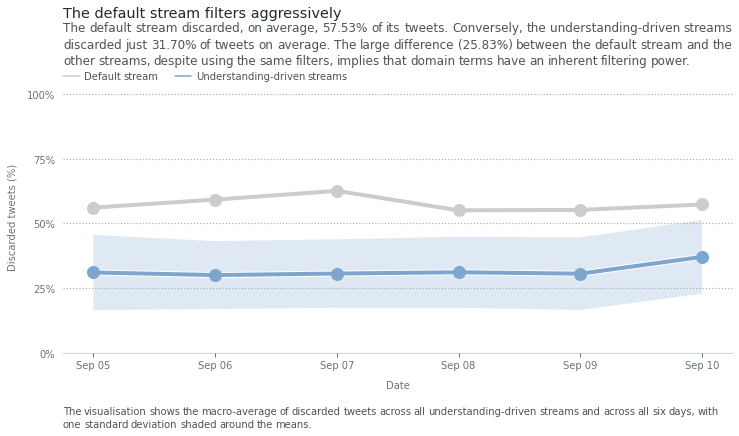

In [13]:
# prepare the data
df['discarded%'] = pd.to_numeric(df['discarded%'])
agg = df[(df.stream != '["*"]')].groupby([ 'date' ]).agg({ 'discarded%': [ 'mean', 'std' ], 
                                                           'consumed': [ 'sum' ], 'filtered': [ 'sum' ] })
y1_mean = df[(df.stream == '["*"]')]['discarded%'].mean()
y2_mean = df[(df.stream != '["*"]')]['discarded%'].mean()
mean_diff = round(y1_mean, 4) - round(y2_mean, 4)

x = df.date.unique()
y1 = df[(df.stream == '["*"]')]['discarded%']
y2 = agg['discarded%']['mean'] # macro-average
# y2 = agg['filtered']['sum']/agg['consumed']['sum'] # micro-average
std = agg['discarded%']['std']

# draw the visualization
figure = plt.figure(figsize=(12,5))
viz = drawable.Drawable(figure)
viz.fill_between(x, y2-std, y2+std, hatch='///', color='C1', alpha=0.25,
                 interpolate=True, linewidth=0, edgecolor='C4')
viz.draw_time_series(x, y1, 'Default stream', color='C5', **style)
viz.scatter(x, y1, color='C5', **scatter_style)
viz.draw_time_series(x, y2, 'Understanding-driven streams', color='C1', **style)
viz.scatter(x, y2, color='C1', **scatter_style)

# finalize the visualization
viz.set_xticks(x)
viz.set_xticklabels([ pd.to_datetime(date).strftime('%b %d') for date in x ])
viz.set_ylim(0, 1.05)
viz.set_yticks([ i/100 for i in range(0, 100+1, 25) ])
viz.set_yticklabels([ f"{ round(y * 100) }%" for y in viz.get_yticks() ])
viz.set_axisbelow(True)
viz.set_xlabel('Date')
viz.set_ylabel('Discarded tweets (%)')
viz.set_title("The default stream filters aggressively", loc='left')
viz.set_caption(f"""The default stream discarded, on average, { "{:.2f}".format(y1_mean * 100) }% of its tweets.
                    Conversely, the understanding-driven streams discarded just  { "{:.2f}".format(y2_mean * 100) }% of tweets on average.
                    The large difference ({ "{:.2f}".format(mean_diff * 100) }%) between the default stream and the other streams,
                    despite using the same filters, implies that domain terms have an inherent filtering power.""",
                align='justify')
viz.set_footnote("The visualisation shows the macro-average of discarded tweets across all understanding-driven streams and across all six days, with one standard deviation shaded around the means.")
viz.savefig('../exports/7.3-filtering.png', dpi=300, bbox_inches='tight')